# Introduction to Complex Exponentials - Direction Finding
### TSE228  Signal Processing. Lab 1, Spring 2025

### 4.3 Python Function to Generate a Sum of Sinusoid Signals

# 1) 
Python code to generate the signal $x(t)= \sum_{k=1}^{N} A_k \cos(2\pi f_k t + \phi_k) =\sum_{k=1}^{N} X_k e^{j2\pi f_k t}$ is included in the file lab1.py as the function make_summed_cos.

## 2)
The code to generate and plot a signal using the function 'make_cos' with the following parameters is shown below 

Frequencies $f_k= 0, 100, 250$ Hz

Complex amplitudes $X_k= 10, 14 e^{-j \pi /3}, 8j$

Sample rate $f_s = 10 000$ Samples/s

Duration 0.1 s

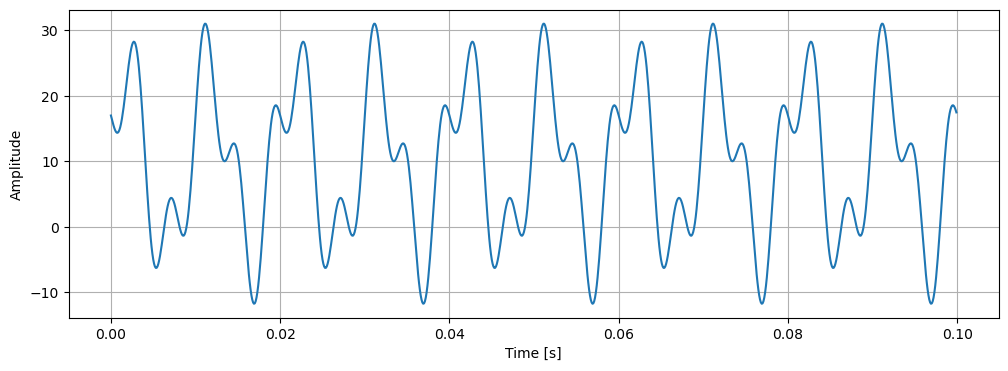

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from cmath import exp
from math import pi

import lab1

Xk = [10, 14*exp(-1j*pi/3), 8j]
fk = [0, 100, 250]
fs = 10000
duration = 0.1

x, t = lab1.make_summed_cos(fk, Xk, fs, duration)

fig = plt.figure(figsize=([12, 4]))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,x)
ax.set(xlabel = "Time [s]", 
       ylabel = "Amplitude")
ax.grid(True)

## 3)
The period of the signal  read from on the graph is $T_0= 0.02 $s

The periods of the individual components are

$f_1=0$ Hz, $T_1=\infty$

$f_2=100$ Hz, $T_2=0.0100$ s

$f_3=250$ Hz, $T_3=0.0040$ s

$f_1$ is a DC-signal and does not vary with time. This does not influence the peroid.

The signals at $f_1$ and $f_2$ will repeat themselves where they have completed an integer number of periods. The time when this first occurs for both of them is  $T_0=0.020$ s $ = 2 T_1 = 5 T_2$.

This corresponds to a fundamental frequency $f_0=1/T_0$ so that  all frequency components $f_k$ can be written $f_k = n f_0$, $n=0, 1, 2, \ldots$. In this case, $f_1 =2 f_0$ and $f_2 = 5 f_0$.

## 4)
$x(t) = Re \{ -2e^{j50\pi t} - e^{j50\pi(t-0.02)} +(2-3j)e^{j50\pi t}  \} = Re \{ ( -2 - e^{-j50\pi \times0.02} +(2-3j) e^{j50\pi t} ) \} $

All components have the same frequency, The angular frequency is $\omega= 50 \pi$ and the frequency $f = \frac{\omega}{2\pi}=25 $ Hz.

The complex amplitudes $X_k$ are 

$X_1= -2$

$X_1= -e^{-j 50 \pi \times 0.02}= -e^{-j\pi} = 1$

$X_1= 2 - 3j$

Period $T_0$ = $1/f_0 = 0.040$ s

Duration $3 T_0 = 0.120 $s

### Calculated from the phasor

Since all frequencies are equal, the result can also be shown on a phasor diagram with zplot.

The resulting amplitude and phase can be found by summing the complex amplitudes $X_k$

$X = \sum_{k=1}^3 X_k = 1-3j = 3.16  e^{-j 1.249}$

Amplitude $A=|X| = 3.16$

Phase $\phi = \angle X = -1.25$ rad = $-72^\circ$


Xk= [-2, (1-1.2246467991473532e-16j), (2-3j)]
X= (1-3j), A= 3.16, phase= -1.249 radians = -71.6 degrees 



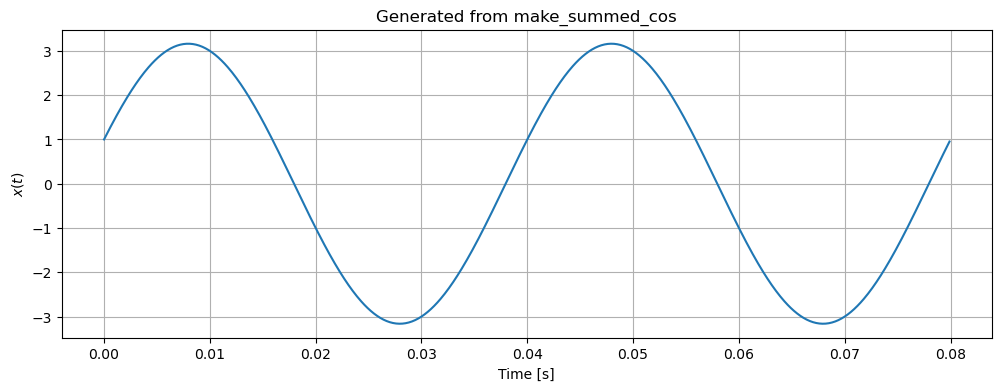

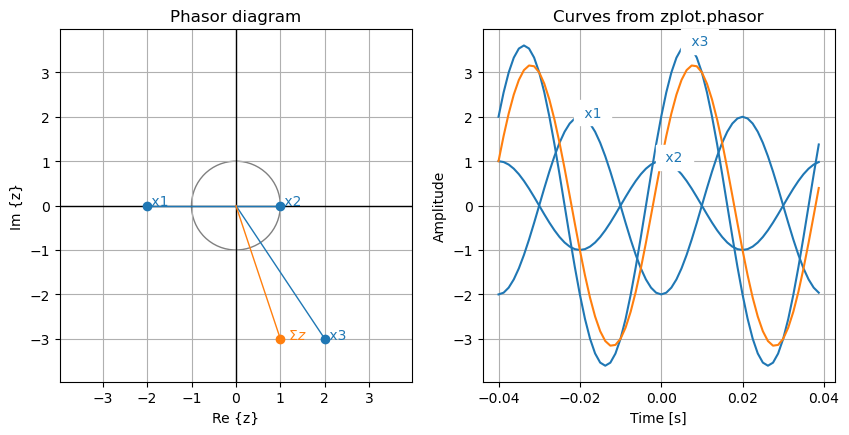

In [53]:
import zplot

# Generate signal
Xk = [-2, -exp(-1j*50*pi*(-0.02)), 2-3j]
fk = [25, 25, 25]

T0= 1/fk[0]
duration = 2*T0

fs = 10000

# Plot signal
x, t = lab1.make_summed_cos(fk, Xk, fs, duration)

fig = plt.figure(figsize=([12, 4]))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,x)
ax.set(xlabel = "Time [s]", 
       ylabel = "$x(t)$", 
       title = "Generated from make_summed_cos")
ax.grid(True)

# Plot phasor
ax= zplot.phasor(Xk, labels= [" x1 ", " x2 ", " x3 "], include_sum=True, include_signal=True, frequency = fk[0])
ax[0].set_title("Phasor diagram")
ax[1].set_title("Curves from zplot.phasor")

X = sum(Xk)
A = np.abs(X)
phi = np.angle(X)
phi_deg = np.degrees(phi)
print (f"Xk= {Xk}")
print (f"X= {X}, A= {A:.2f}, phase= {phi:.3f} radians = {phi_deg:.1f} degrees ")
print()
